<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 종합실습 - 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="800" align="left">

# 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 필요한 라이브러리와 대상 파일을 읽어옵니다.
- 시각화에 한글이 포함될 경우 이에 대한 설정을 진행합니다.

**1) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [104]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**2) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [107]:
# 한글 폰트설정 #1
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [109]:
# 한글 폰트설정 #2: 구글 코랩 포함
#!pip install koreanize_matplotlib
#import koreanize_matplotlib

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv
- 파일 경로2: https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv
- 파일 경로3: https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv

In [112]:
# pop01 데이터 읽어오기
path1 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path1)
pop01


,year,k_male,k_female
0,1981,4160,4191
1,1982,4160,4191
2,1983,4160,4191
3,1984,4160,4191
4,1985,4160,4191
5,1986,4899,4888
6,1987,5000,4979
7,1988,5156,5120
8,1989,5305,5261
9,1990,5321,5282


In [114]:
# pop02 데이터 읽어오기

path2 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path2)
pop02


,year,f_male,f_female
0,1985,7,6
1,1986,7,5
2,1987,6,5
3,1988,5,5
4,1989,6,5
5,1990,5,4
6,1991,18,14
7,1992,19,16
8,1993,19,17
9,1994,21,19


In [116]:
# pop03 데이터 읽어오기

path3 = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
pop03 = pd.read_csv(path3)
pop03


,year,household,older_65
0,1981,1915,246
1,1982,2001,260
2,1983,2116,260
3,1984,2246,275
4,1985,2338,211
5,1986,2428,305
6,1987,2518,329
7,1988,2658,349
8,1989,2817,363
9,1990,2820,363


# 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기술 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [120]:
# 데이터 크기 확인
print(pop01.shape)
print(pop02.shape)
print(pop03.shape)

(42, 3)
(38, 3)
(42, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값을 각각 확인합니다.

In [123]:
# year 최댓값, 최솟값 확인
print(pop01['year'].min() , pop01['year'].max())
print(pop02['year'].min() , pop02['year'].max()) # 1981~1984 년 사이 결측값
print(pop03['year'].min() , pop03['year'].max())

1981 2022
1985 2022
1981 2022


**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [126]:
# 결측치 확인 , 세 데이터 프레임에 결측치는 없음 

print(pop01.isnull().sum())
print(pop02.isnull().sum())
print(pop03.isnull().sum())


year        0
k_male      0
k_female    0
dtype: int64
year        0
f_male      0
f_female    0
dtype: int64
year         0
household    0
older_65     0
dtype: int64


**4) 열 정보 확인**

- 세 개의 데이터프레임의 열 정보를 각각 확인합니다.

In [129]:
# 열 정보 확인
print(pop01.columns)
print(pop02.columns)
print(pop03.columns)

Index(['year', 'k_male', 'k_female'], dtype='object')
Index(['year', 'f_male', 'f_female'], dtype='object')
Index(['year', 'household', 'older_65'], dtype='object')


# 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat 함수로 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- 그러므로 **merge** 함수로 **year** 열을 기준으로 **outer** 방식으로 병합(조인)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 병합은 한 번에 두 데이터프레임만 할 수 있으므로 두 번 시도해야 합니다.
    - 1차 병합: pop01, pop02 병합 --> pop
    - 2차 병합: pop, pop03 병합 --> pop
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [133]:
# 데이터프레임 조인
tmp = pd.merge(pop01,pop02, how = 'outer', on ='year')
pop = pd.merge(tmp,pop03, how = 'outer', on ='year')

pop

,year,k_male,k_female,f_male,f_female,household,older_65
0,1981,4160,4191,NaN,NaN,1915,246
1,1982,4160,4191,NaN,NaN,2001,260
2,1983,4160,4191,NaN,NaN,2116,260
3,1984,4160,4191,NaN,NaN,2246,275
4,1985,4160,4191,7.0,6.0,2338,211
5,1986,4899,4888,7.0,5.0,2428,305
6,1987,5000,4979,6.0,5.0,2518,329
7,1988,5156,5120,5.0,5.0,2658,349
8,1989,5305,5261,6.0,5.0,2817,363
9,1990,5321,5282,5.0,4.0,2820,363


**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [136]:
# 결측치 확인
pop.isnull().sum()

year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64

**3) 결측치 처리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [139]:
# 결측치 제거
pop.dropna(axis = 0, inplace = True)

pop



,year,k_male,k_female,f_male,f_female,household,older_65
4,1985,4160,4191,7.0,6.0,2338,211
5,1986,4899,4888,7.0,5.0,2428,305
6,1987,5000,4979,6.0,5.0,2518,329
7,1988,5156,5120,5.0,5.0,2658,349
8,1989,5305,5261,6.0,5.0,2817,363
9,1990,5321,5282,5.0,4.0,2820,363
10,1991,5468,5405,18.0,14.0,3330,424
11,1992,5500,5435,19.0,16.0,3383,434
12,1993,5478,5412,19.0,17.0,3431,445
13,1994,5409,5351,21.0,19.0,3456,454


**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [141]:
# 열 추가
pop['k_total'] = pop['k_male']+pop['k_female']
pop['f_total'] =  pop['f_male']+pop['f_female']
pop['male'] =  pop['k_male']+pop['f_male']
pop['female'] =  pop['k_female']+pop['f_female']
pop['total'] =  pop['k_total']+pop['f_total']

pop.head()


,year,k_male,k_female,f_male,f_female,household,older_65,k_total,f_total,male,female,total
4,1985,4160,4191,7.0,6.0,2338,211,8351,13.0,4167.0,4197.0,8364.0
5,1986,4899,4888,7.0,5.0,2428,305,9787,12.0,4906.0,4893.0,9799.0
6,1987,5000,4979,6.0,5.0,2518,329,9979,11.0,5006.0,4984.0,9990.0
7,1988,5156,5120,5.0,5.0,2658,349,10276,10.0,5161.0,5125.0,10286.0
8,1989,5305,5261,6.0,5.0,2817,363,10566,11.0,5311.0,5266.0,10577.0


**4) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
    - year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65
- 위 순서로 pop 데이터프레임을 조회한 결과를 다시 pop 데이터프레임으로 선언하면 됩니다.


In [143]:
# 열 순서 변경

pop = pop[['year', 'household', 'total', 'male', 'female', 'k_total', 'k_male', 'k_female', 'f_total', 'f_male', 'f_female', 'older_65']]
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
4,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
5,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
6,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
7,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
8,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363


**5) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 번호를 갖지 않으므로 인덱스를 초기화합니다.
- 단 기존 인덱스 값은 의미가 없으니 버립니다.

In [147]:
# 인덱스 초기화
pop.reset_index(drop = True ,inplace = True)

pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363


# 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화, 즉 total 열 값을 선 그래프로 시각화해 확인합니다.

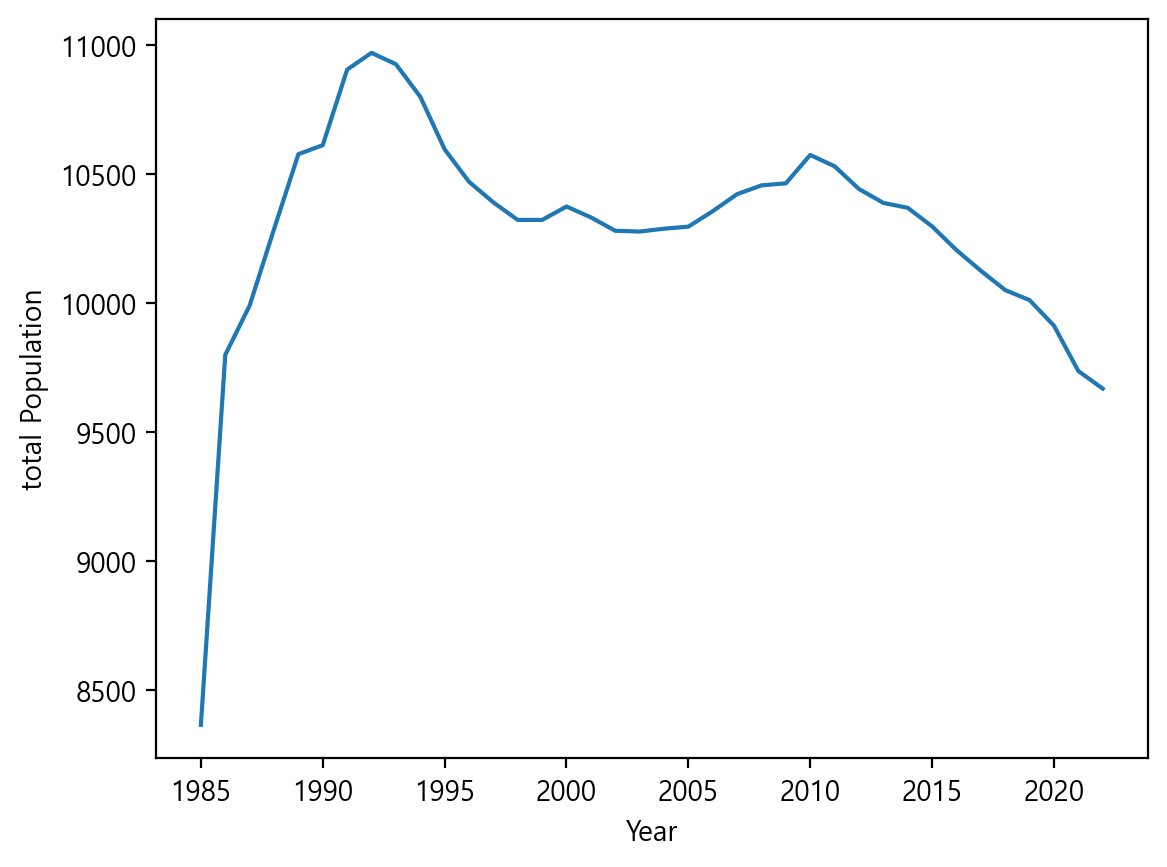

In [153]:
# 전체 인구 변화

plt.plot(pop['year'], pop['total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


**2) 남녀 인구 변화**

- 전체 남녀 인구 변화, 즉 male, female 열 값을 선 그래프로 시각화해 확인합니다.


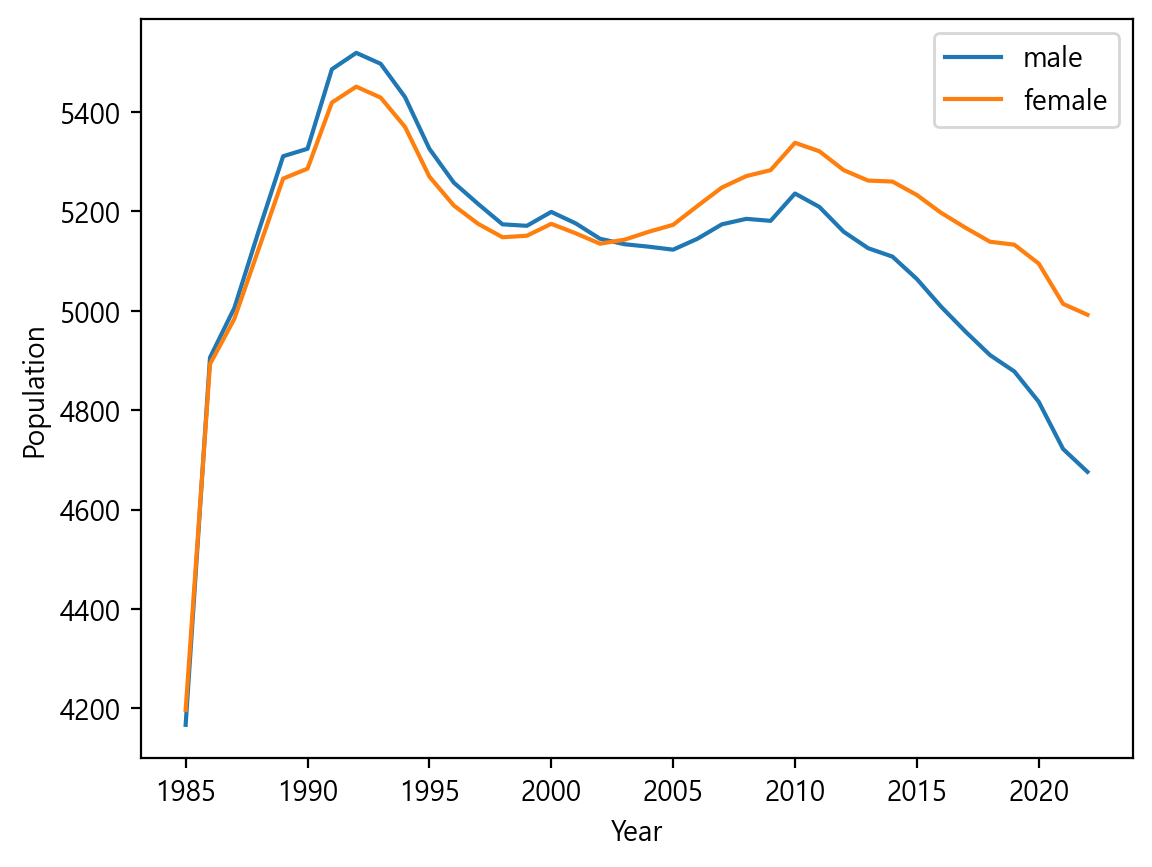

In [162]:
# 남녀 인구 변화

plt.plot(pop['year'], pop[['male','female']])
plt.legend(['male','female'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()



**3) 한국인 인구 변화**

- 한국인 인구 변화, 즉 k_male, k_female 열 값을 선 그래프로 시각화해 확인합니다.

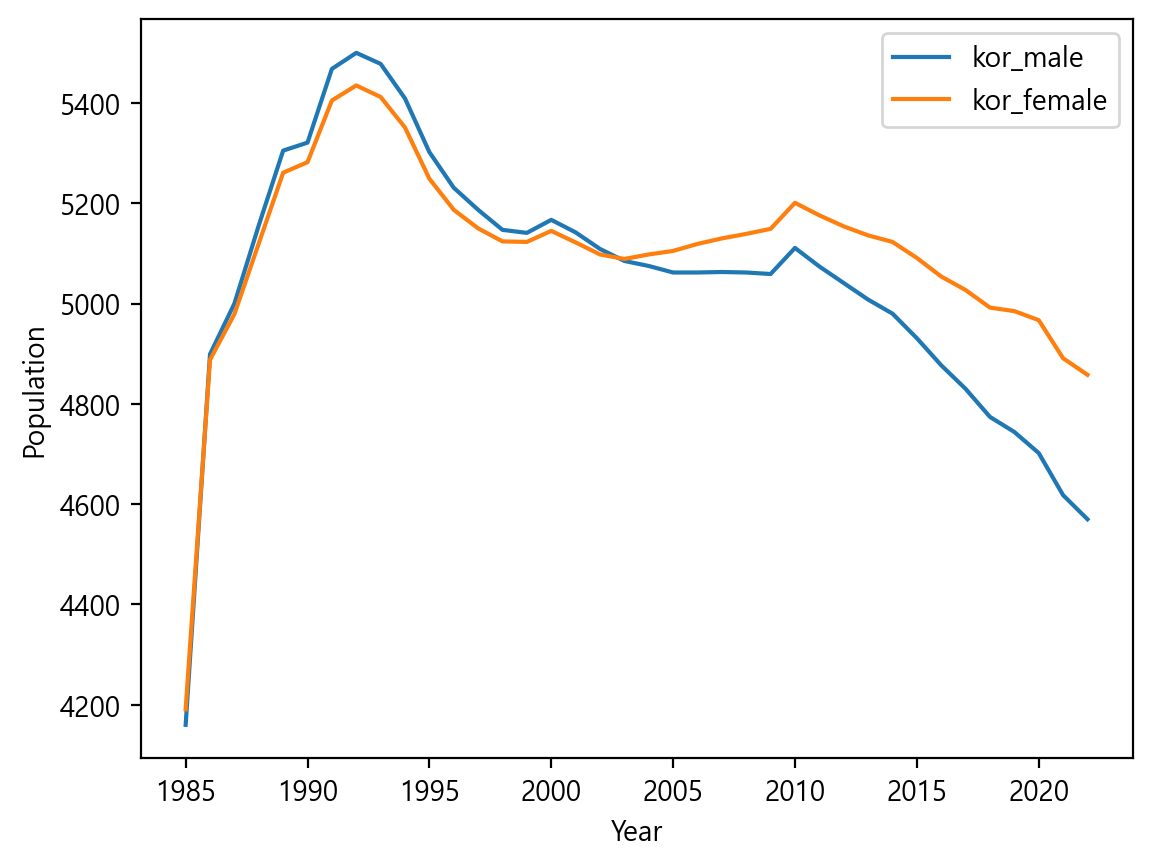

In [164]:
# 한국인 남녀 인구 변화
plt.plot(pop['year'], pop[['k_male','k_female']])
plt.legend(['kor_male','kor_female'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()




**4) 외국인 인구 변화**

- 외국인 인구 변화, 즉 f_male, f_female 열 값을 선 그래프로 시각화해 확인합니다.

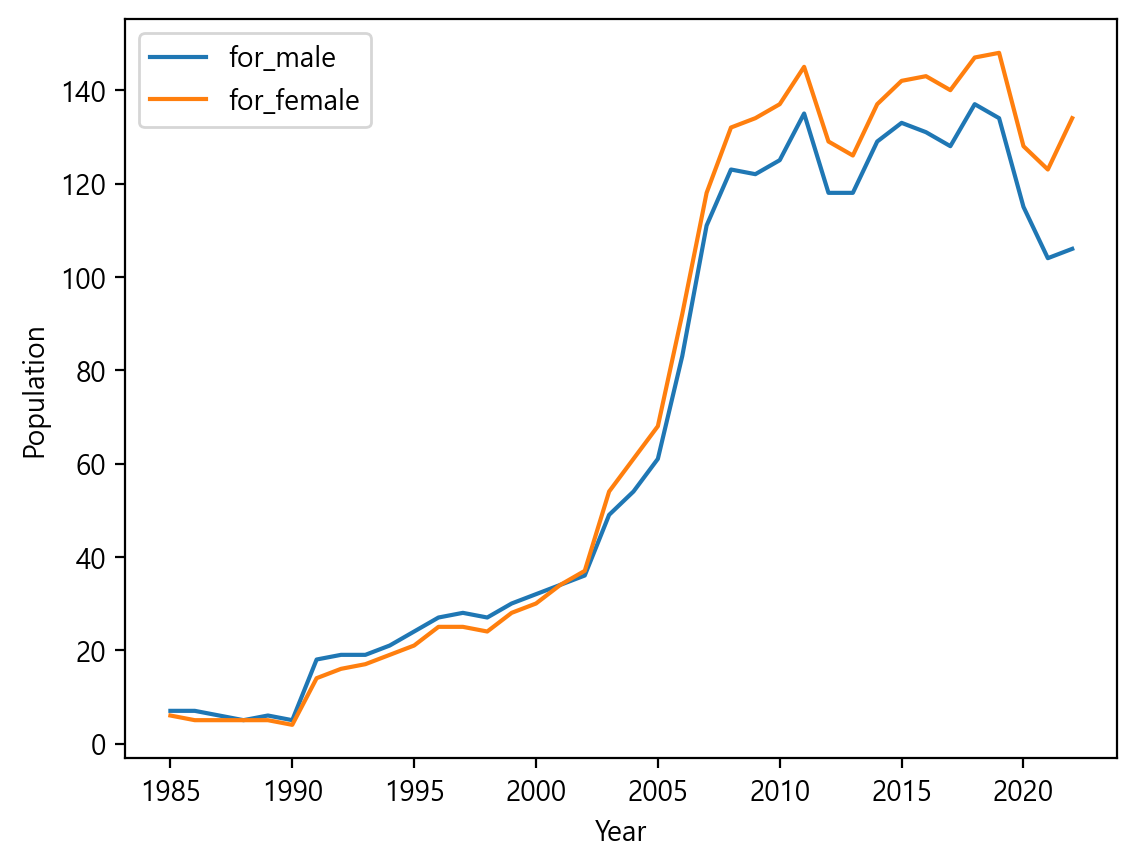

In [166]:
# 외국인 남녀 인구 변화

plt.plot(pop['year'], pop[['f_male','f_female']])
plt.legend(['for_male','for_female'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


**5) 가구수 변화**

- 가구수 변화, 즉 household 열 값을 선 그래프로 시각화해 확인합니다.

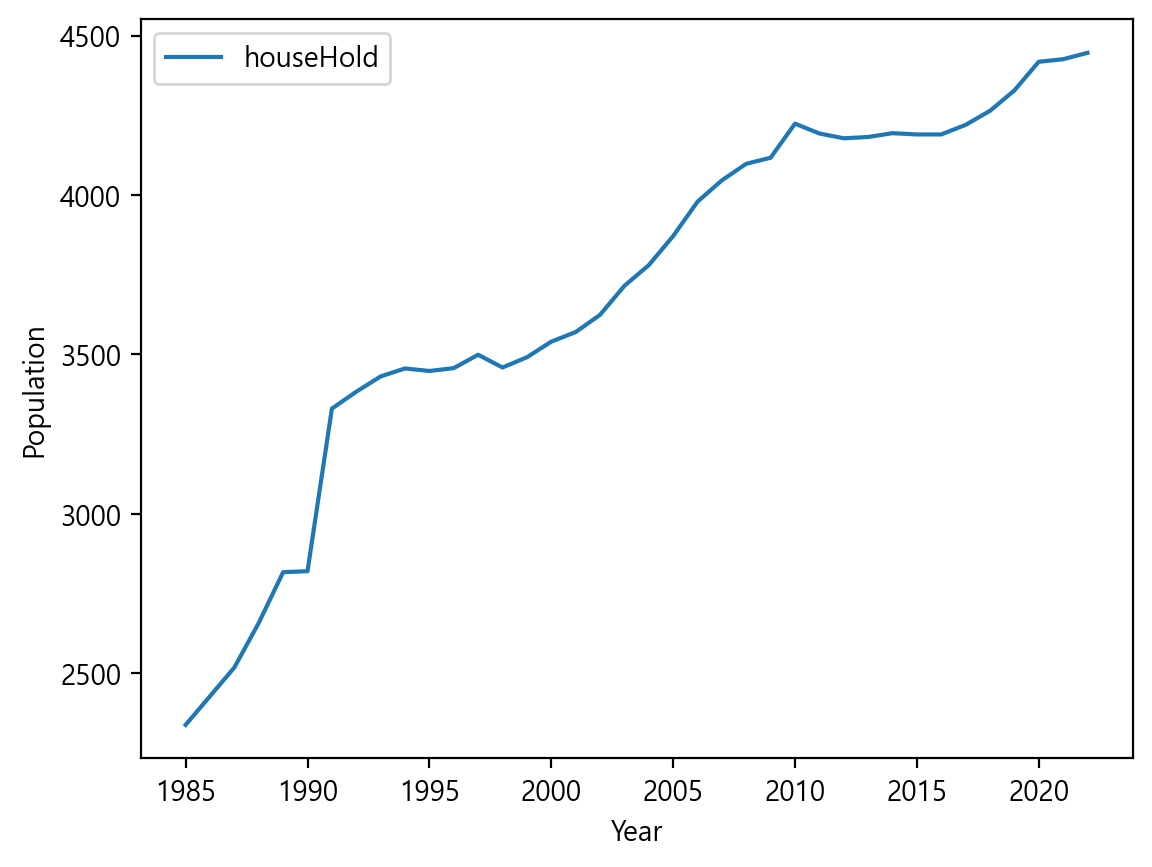

In [168]:
# 가구수 변화
plt.plot(pop['year'], pop['household'])
plt.legend(['houseHold'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()



**6) 노령인구 변화**

- 노령인구 변화, 즉 older_65 열 값을 선 그래프로 시각화해 확인합니다.

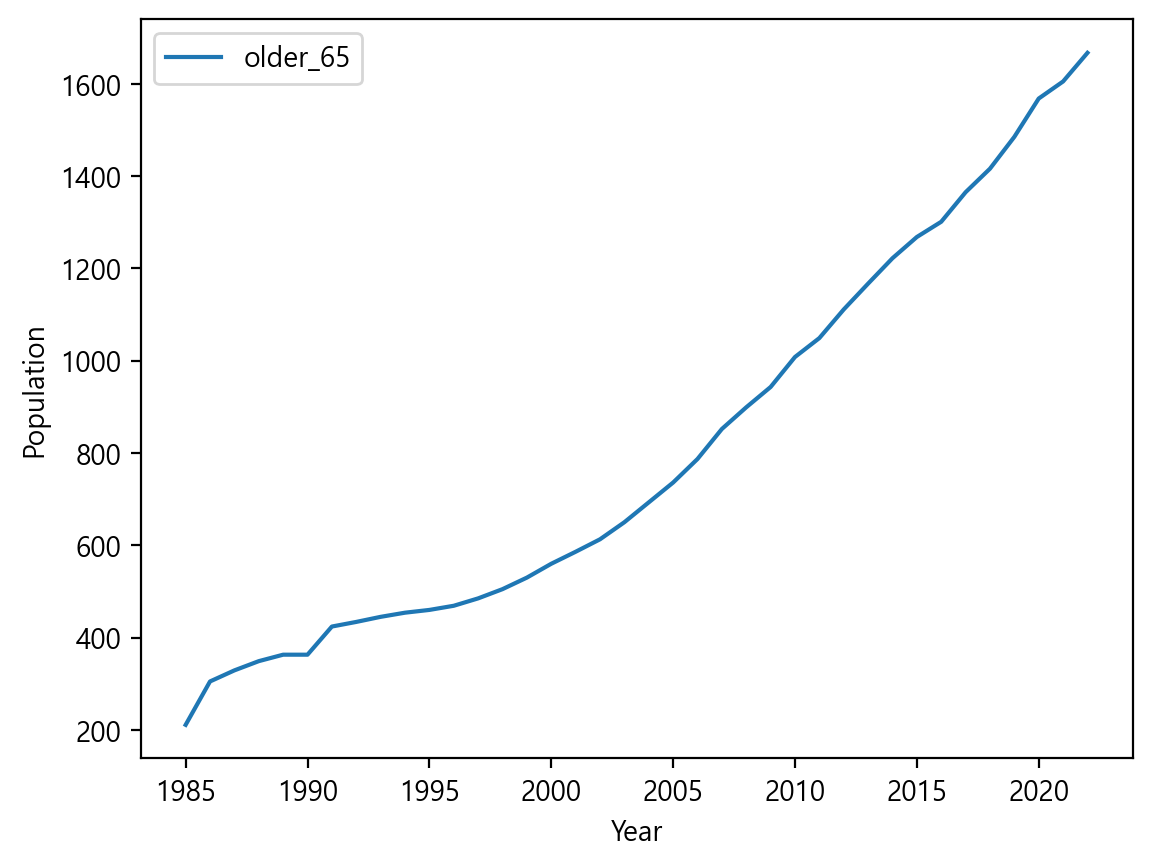

In [171]:
# 65세 이상 변화
plt.plot(pop['year'], pop['older_65'])
plt.legend(['older_65'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


